In [1]:
import numpy as np
import keras
#from keras.layers import Input, Dense, Conv2D, MaxPooling2D, concatenate, Flatten, AveragePooling2D
from keras.layers import*
from keras.models import Model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import*
from keras.regularizers import l2

Using Theano backend.


In [2]:
max_epoch = 20
def poly_decay(epoch):
    base_lr = 0.01
    lr = base_lr*((1-(epoch/max_epoch))**0.5)
    return lr
lrate = LearningRateScheduler(poly_decay)
callbacks_list = [lrate]

In [3]:
Xtrain = np.load("Xtrain.npy")
Xtest = np.load("Xtest.npy")
Xval = np.load("Xval.npy")
Ytrain = np.load("Ytrain.npy")
Ytest = np.load("Ytest.npy")
Yval = np.load("Yval.npy")

In [4]:
img_input = Input(shape=(40,40,1), name='img_input')
x = Conv2D(64,7, strides=(2,2), activation = 'relu',padding='same')(img_input)
x = MaxPooling2D(pool_size=(3, 3), strides=(2,2),padding='same')(x)   
x = Conv2D(192,3,strides=(2,2),padding='same')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2,2),padding='same')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.2)(x)

#first inception layer 3a
x1 = Conv2D(64,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #1*1
x2 = Conv2D(96,3, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #3*3 reduce
x2 = Conv2D(128,3, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x2) #3*3 
x3 = Conv2D(16,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #5*5 reduce
x3 = Conv2D(32,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x3) #5*5 
x4 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x) #pool proj
x4 = Conv2D(32,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x4) #1*1
x = concatenate([x1,x2,x3,x4], axis = 3)
#x = BatchNormalization()(x)
#x = Dropout(0.2)(x)
#second inception layer 3b
x1 = Conv2D(128,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #1*1
x2 = Conv2D(128,3,padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #3*3 reduce
x2 = Conv2D(192,3, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x2) #3*3 
x3 = Conv2D(32,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #5*5 reduce
x3 = Conv2D(96,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x3) #5*5 
x4 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x) #pool proj
x4 = Conv2D(64,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x4)
x = concatenate([x1,x2,x3,x4], axis = 3)
x = MaxPooling2D(pool_size=(3, 3), strides=(2,2),padding='same')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.2)(x)
#third inception layer 4a
x1 = Conv2D(192,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #1*1
x2 = Conv2D(96,3,padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #3*3 reduce
x2 = Conv2D(208,3, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x2) #3*3 
x3 = Conv2D(16,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x) #5*5 reduce
x3 = Conv2D(48,5, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x3) #5*5 
x4 = MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='same')(x) #pool proj
x4 = Conv2D(64,1, padding='same', activation = 'relu', W_regularizer=l2(0.0002))(x4) #1*1
x = concatenate([x1,x2,x3,x4], axis = 3)
#x = BatchNormalization()(x)
#x = MaxPooling2D(pool_size=(3, 3), strides=(2,2),padding='same')(x)
x = AveragePooling2D()(x)
x = Flatten()(x)
#x = Dropout(0.4)(x)
x = Dense(4096, activation='relu', W_regularizer=l2(0.0002))(x)
x = Dense(1024, activation='relu', W_regularizer=l2(0.0002))(x)
x = Dense(7, activation='softmax', W_regularizer=l2(0.0002))(x)
final_model = Model(inputs = [img_input], outputs = [x])
final_model.summary()

/home/amitoj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 1, padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/home/amitoj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, 3, padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()
/home/amitoj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/home/amitoj/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, 5, padding="same", activation="relu", kernel_regular

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_input (InputLayer)          (None, 40, 40, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 20, 20, 64)   3200        img_input[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 10, 10, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 5, 5, 192)    110784      max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

In [7]:
sgd = SGD(lr=0.01, nesterov=False)
final_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [9]:
filepath= "weights/" +"paper-spec" + "-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list.append(checkpoint)
model_history = final_model.fit(Xtrain, Ytrain, epochs = max_epoch, batch_size = 64,callbacks = callbacks_list ,
                                validation_data=(Xval, Yval))

Train on 287100 samples, validate on 35890 samples
Epoch 1/20
287040/287100 [============================>.] - ETA: 0s - loss: 2.6952 - acc: 0.3179
Epoch 00001: val_acc improved from -inf to 0.36361, saving model to weights/batchnorm-drop-01-0.3636.hdf5

Epoch 00001: val_acc improved from -inf to 0.36361, saving model to weights/batchnorm-drop-01-0.3636.hdf5

Epoch 00001: val_acc improved from -inf to 0.36361, saving model to weights/paper-spec-01-0.3636.hdf5
287100/287100 [==============================] - 1747s 6ms/step - loss: 2.6952 - acc: 0.3179 - val_loss: 2.4846 - val_acc: 0.3636
Epoch 2/20
287040/287100 [============================>.] - ETA: 0s - loss: 2.3541 - acc: 0.4145
Epoch 00002: val_acc improved from 0.36361 to 0.43575, saving model to weights/batchnorm-drop-02-0.4357.hdf5

Epoch 00002: val_acc improved from 0.36361 to 0.43575, saving model to weights/batchnorm-drop-02-0.4357.hdf5

Epoch 00002: val_acc improved from 0.36361 to 0.43575, saving model to weights/paper-spec

287040/287100 [============================>.] - ETA: 0s - loss: 1.2396 - acc: 0.7622
Epoch 00018: val_acc did not improve

Epoch 00018: val_acc did not improve

Epoch 00018: val_acc did not improve
287100/287100 [==============================] - 1781s 6ms/step - loss: 1.2396 - acc: 0.7622 - val_loss: 2.1788 - val_acc: 0.5321
Epoch 19/20
287040/287100 [============================>.] - ETA: 0s - loss: 1.1968 - acc: 0.7790
Epoch 00019: val_acc did not improve

Epoch 00019: val_acc did not improve

Epoch 00019: val_acc did not improve
287100/287100 [==============================] - 1740s 6ms/step - loss: 1.1968 - acc: 0.7790 - val_loss: 2.2135 - val_acc: 0.5388
Epoch 20/20
287040/287100 [============================>.] - ETA: 0s - loss: 1.1542 - acc: 0.7956
Epoch 00020: val_acc did not improve

Epoch 00020: val_acc did not improve

Epoch 00020: val_acc did not improve
287100/287100 [==============================] - 1762s 6ms/step - loss: 1.1541 - acc: 0.7956 - val_loss: 2.3924 - val_a

In [10]:
final_model.save("paper-spec-after-20-epoch-weight")

In [15]:
import matplotlib.pyplot as plt

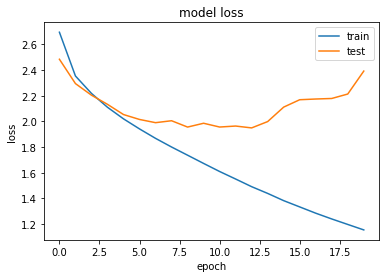

In [19]:
plt.figure()
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig("paper-spec.jpg")
plt.show()

In [18]:
plt.savefig("paper-spec.jpg")